# Top sights Palma model

In [19]:
import os
os.chdir('../')
print(os.getcwd())

/home/mariadelmar/documents/madm/tfm/code/cruiseshiptourism


In [110]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tourist import Tourist 
import tasks as tsk
from vincenty import vincenty

First, read the csv with google palma points of interest.

In [99]:
topsights = pd.read_csv(
            "palmadata/palmapointsofinterest.csv", 
            header = 0,
            dtype = {
                "name": 'str',
                "description": 'str',
                "latitude": 'float',
                "longitude": 'float',
                "stars": 'float',
                "reviews": 'float'
            }
        )

Add cruise ship location into topsights dataframe.  <br> Index must be 0.

In [100]:
shiprow = {"name": ["cruise ship"], 
           "description": ["tourist cruise ship"],
           "latitude": [39.568276],
           "longitude": [2.637640],
           "stars": [0], 
           "reviews": [0]}

shipdf = pd\
    .DataFrame(data=shiprow)\
    .astype(dtype={
                "name": "str",
                "description": "str",
                "latitude": "float",
                "longitude": "float",
                "stars": "float",
                "reviews": "float"
            })

topsights = pd.concat([shipdf,topsights]).reset_index(drop=True)

In [101]:
topsights

,name,description,latitude,longitude,stars,reviews
0,cruise ship,tourist cruise ship,39.568276,2.637640,0.000000,0.0
1,Catedral-Basílica de Santa María de Mallorca,Gothic place of worship on the seafront,39.567425,2.648299,4.674750,31176.0
2,Castell de Bellver,Hilltop 1300s castle for panoramic views,39.563814,2.619354,4.436243,10446.0
3,Royal Palace of La Almudaina,Historic palace of the Royal Family,39.567886,2.647022,4.420346,2310.0
4,Palma Aquarium,Aquarium with huge shark-viewing tank,39.531374,2.729529,4.367786,14764.0
...,...,...,...,...,...,...
94,Playa Can Pastilla,Beach,39.533628,2.722827,4.333334,588.0
95,Monestir de la Real,Monastery and convent,39.604397,2.640168,4.411765,17.0
96,Ca'n Oms,Historical landmark,39.568796,2.649844,4.250000,8.0
97,La Misericòrdia,Art,39.574852,2.646963,4.286533,349.0


## Locations

There are locations outside from Palma. These locations must be removed.

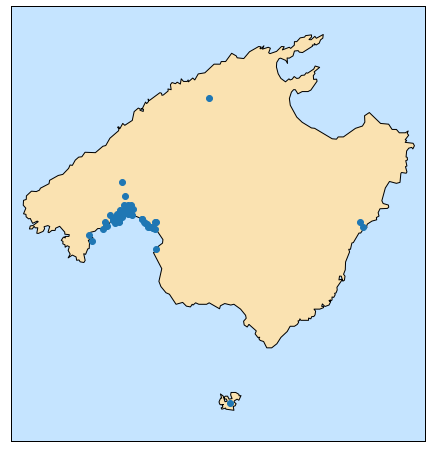

In [28]:
# values
latitude = topsights['latitude'].values
longitude = topsights['longitude'].values

# Map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(
            projection='merc', resolution='h',
            llcrnrlat=39.055777,  # The lower left corner geographical latitude
            llcrnrlon=2.310797,   # The lower left corner geographical longitude
            urcrnrlat=40.025957,  # The upper right corner geographical latitude
            urcrnrlon=3.508145   # The upper right corner geographical longitude
        )

m.drawcoastlines()
m.drawmapboundary(fill_color='#C5E4FF')
m.fillcontinents(color='#FAE2B1')

# scatter data,color by stars, size by reviews
m.scatter(longitude, latitude, latlon=True,
          color='blue', alpha=1, zorder=10)

Define center of Palma and maximum distance from this point.

In [177]:
center = {"name":"center of Palma",
          "latitude": 39.579883,
          "longitude": 2.651031}
bellvercastle = topsights[topsights["name"]=="Castell de Bellver"]

maxdist = vincenty((center["latitude"], center["longitude"]),
                   (bellvercastle.latitude.values, bellvercastle.longitude.values),
                   miles=False)

inpalma = [vincenty((center["latitude"], center["longitude"]), (p1,p2), miles=False) <= maxdist 
           for (p1,p2) in list(zip(topsights.latitude.values, topsights.longitude.values))]

topsightspalma = topsights[inpalma]

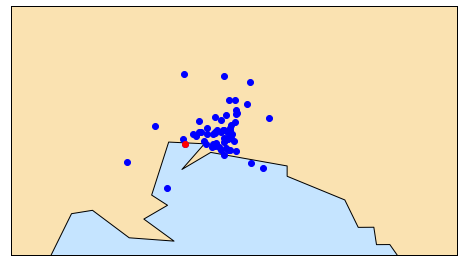

In [188]:
# values
latitude = topsightspalma.latitude.values
longitude = topsightspalma.longitude.values

# Map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(
            projection='merc', resolution='h',
            llcrnrlat=39.541089, # The lower left corner geographical latitude
            llcrnrlon=2.582399,   # The lower left corner geographical longitude
            urcrnrlat=39.601874,  # The upper right corner geographical latitude
            urcrnrlon=2.723818 # The upper right corner geographical longitude
        )

m.drawcoastlines()
m.drawmapboundary(fill_color='#C5E4FF')
m.fillcontinents(color='#FAE2B1')

# scatter data,color by stars, size by reviews
m.scatter(longitude, latitude, latlon=True,
          color='blue', alpha=1, zorder=10)

m.scatter(longitude[0], latitude[0], latlon=True,
          color="red", alpha=1, zorder=10)